<a href="https://colab.research.google.com/github/akgulhandan/MscThesis/blob/main/CreditRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1A2O42qIXP0MTit5Cer6EH_51wyey9GfI

## Get the dataset to colab

Downloading...
From: https://drive.google.com/uc?id=1A2O42qIXP0MTit5Cer6EH_51wyey9GfI
To: /content/credit_risk_dataset.csv
100% 1.80M/1.80M [00:00<00:00, 43.7MB/s]


# Import Libs

In [2]:
# data
import pandas as pd
import numpy as np


# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud

# styling
%matplotlib inline
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.facecolor'] = '#00000000'

import os
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Read data
data_original =  pd.read_csv("credit_risk_dataset.csv")
data = pd.read_csv("credit_risk_dataset.csv")


# Print sample
data.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': '#daefdd','color': 'black','border-color': '#8b8c8c'})

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,32,130000,MORTGAGE,7.000000,MEDICAL,B,13000,12.690000,0,0.100000,N,8
1,34,33612,MORTGAGE,0.000000,PERSONAL,A,9000,7.740000,1,0.270000,N,9
2,23,39000,RENT,1.000000,EDUCATION,B,12000,10.990000,1,0.310000,N,4
3,25,41000,RENT,3.000000,VENTURE,B,8000,10.990000,0,0.200000,N,4
4,34,63000,RENT,3.000000,EDUCATION,B,5600,11.580000,0,0.090000,N,5
5,32,80000,MORTGAGE,15.000000,VENTURE,A,12000,5.990000,0,0.150000,N,8


In [4]:
data.info() #checks the information of raw data columns for data type, Non-null counts etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
data.head() # shows the first a few row of data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
data['loan_intent'].unique()  #shows the all type of loan intent among all the customers

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [7]:
data.isnull().sum() # shows the total null values for each column

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
Description=data.describe() # this function creates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

display(Description.transpose()) #to show for each line  in row, transpose() is used

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


# Read and Explain Dataset

In [13]:
data.corr(numeric_only=True)  #shows the correlation between the numeric columns.

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


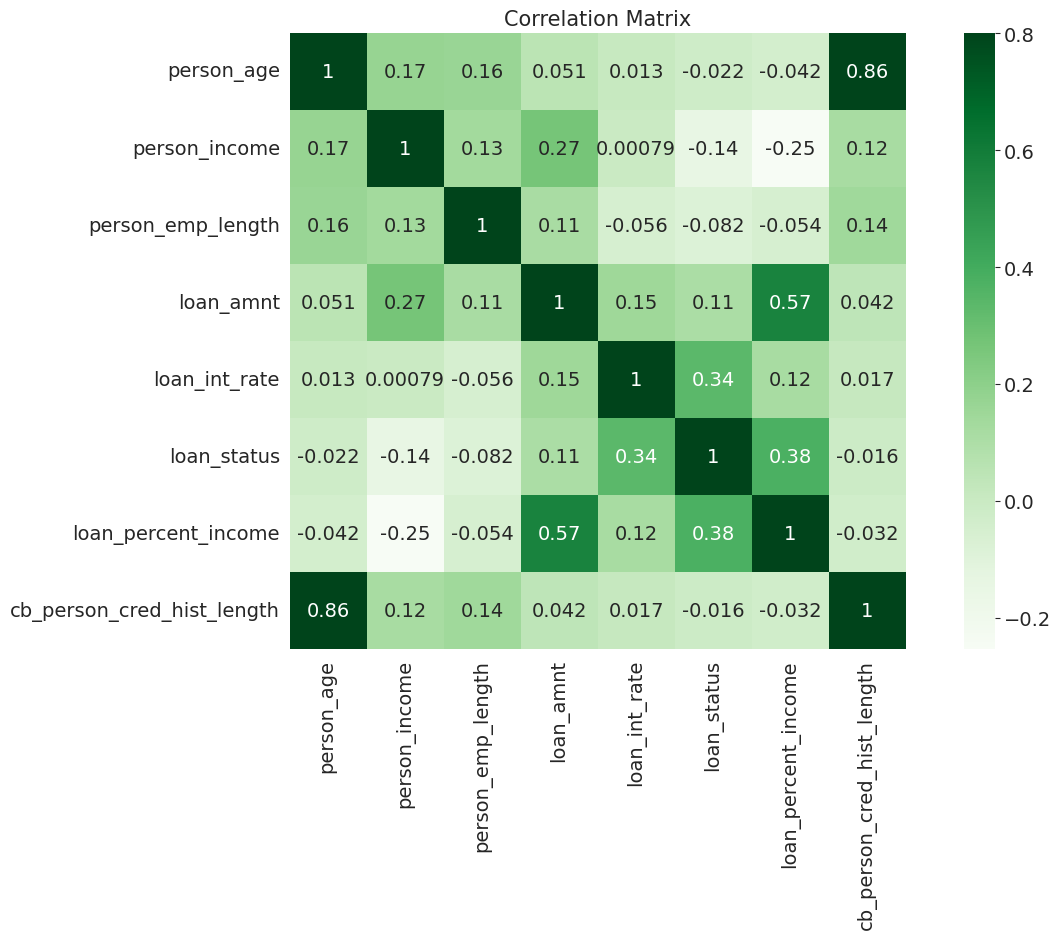

In [14]:
#creating correlation matrix

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(data.corr(numeric_only=True), vmax =.8, square = True, annot = True,cmap='Greens' )
plt.title('Correlation Matrix',fontsize=15);

In [ ]:
from IPython.core.display import HTML

#Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
def multi_table(table_list):
        return HTML('<table><tr style="background-color:#ddefdd;">' +  ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +'</tr></table>')

In [ ]:
nunique_df={var:pd.DataFrame(data[var].value_counts())
           for var in {'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'}}

multi_table([nunique_df['person_age'],nunique_df['person_income'],nunique_df['person_home_ownership'],nunique_df['person_emp_length'],nunique_df['loan_intent'],nunique_df['loan_grade'],nunique_df['loan_amnt'],nunique_df['loan_int_rate'],nunique_df['loan_status'],nunique_df['loan_percent_income'],nunique_df['cb_person_default_on_file'],nunique_df['cb_person_cred_hist_length']])

# Feature Description

person_age: Age of the individual applying for the loan.

person_income: Annual income of the individual.

person_home_ownership: Type of home ownership of the individual.

rent: The individual is currently renting a property.

mortgage: The individual has a mortgage on the property they own.

own: The individual owns their home outright.

other: Other categories of home ownership that may be specific to the dataset.

person_emp_length: Employment length of the individual in years.

loan_intent: The intent behind the loan application.

loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.

A: The borrower has a high creditworthiness, indicating low risk.
B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
C: The borrower's creditworthiness is moderate.
D: The borrower is considered to have higher risk compared to previous grades.
E: The borrower's creditworthiness is lower, indicating a higher risk.
F: The borrower poses a significant credit risk.
G: The borrower's creditworthiness is the lowest, signifying the highest risk.
loan_amnt: The loan amount requested by the individual.

loan_int_rate: The interest rate associated with the loan.

loan_status: Loan status, where 0 indicates non-default and 1 indicates default.

0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
loan_percent_income: The percentage of income represented by the loan amount.

cb_person_default_on_file: Historical default of the individual as per credit bureau records.

Y: The individual has a history of defaults on their credit file.
N: The individual does not have any history of defaults.
cb_preson_cred_hist_length: The length of credit history for the individual.

In [15]:
#MAX AND MIN AGE
max_ = data['person_age'].max()
min_ = data['person_age'].min()
print(f"maximum Age {max_}")
print(f"minimum Age {min_}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')

age_group([0 ,18, 26, 36, 46, 56, 66])

maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17829
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2360
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98


# Exploratory Data Analysis

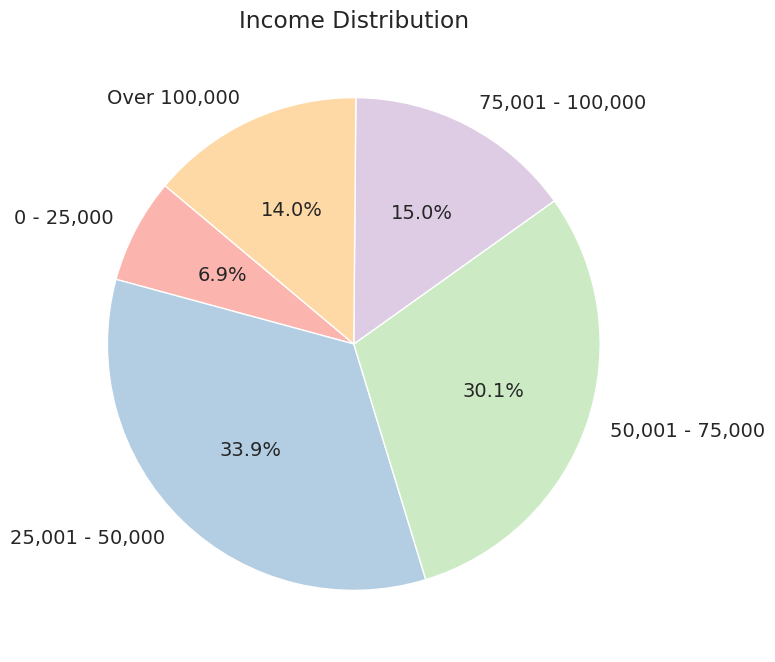

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame containing the 'person_income' column.
# Replace 'data' with the actual name of your DataFrame.

# Define income ranges
income_ranges = [0, 25000, 50000, 75000, 100000, float('inf')]
labels = ['0 - 25,000', '25,001 - 50,000', '50,001 - 75,000', '75,001 - 100,000', 'Over 100,000']

# Calculate the number of people in each income range
counts = []
for i in range(len(income_ranges)-1):
    if i == len(income_ranges) - 2:
        # Include the upper boundary for the last range
        count = data['person_income'].between(income_ranges[i], income_ranges[i+1], inclusive="both").sum()
    else:
        count = data['person_income'].between(income_ranges[i], income_ranges[i+1], inclusive="left").sum()
    counts.append(count)

# Create a pie chart accordingly
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Income Distribution')
plt.show()


In [17]:
#max and min income
max_ = data['person_income'].max()
min_ = data['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')

income_group([0, 25000, 50000, 75000, 100000,float('inf')])

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and inf: Number of people 4207


In [18]:
#min and max loan amount
max_loan_amount = data['loan_amnt'].max()
min_loan_amount = data['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = data['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')

loan_amount_group([0, 5000, 10000, 15000, float('inf')])

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and inf: Number of people 4929


In [19]:
level_counts=data.person_home_ownership.value_counts()
fig=px.pie(values=level_counts.values,
          names=level_counts.index,
          color_discrete_sequence=px.colors.sequential.Mint,
          title= 'person_home_ownership'
          )
fig.update_traces(textinfo='label+percent+value', textfont_size=13,
                  marker=dict(line=dict(color='#102000', width=0.2)))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color='gray'
fig.show()

In [20]:
data.loan_status.value_counts()  # this will be the our target. It will help to see if the customer would default or not.

# see the status of borrower(customer)
#loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
#0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
#1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
#still we have dirty data at this point

loan_status
0    25473
1     7108
Name: count, dtype: int64

# Dealing with Outliers

In [22]:
data.isnull().sum() #shows the null value in total

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [23]:
#Let's clean the null values by dropping them
data.dropna(axis=0,inplace=True)

In [24]:
data['loan_status'].value_counts()

loan_status
0    22435
1     6203
Name: count, dtype: int64

Target Distribution Ratio = Default/Non-Default: 0.2764876309338088


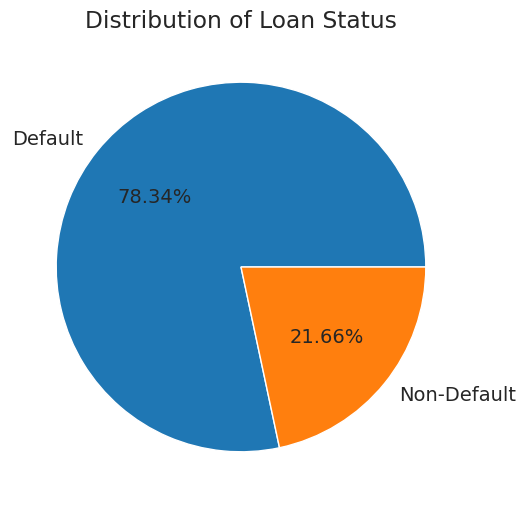

In [28]:
# Since loan_status is our target, we need to understand the ratio between default and non-default
#0: Non-default
#1: Default

status = data['loan_status'].value_counts()
print("Target Distribution Ratio = Default/Non-Default:", status[1]/status[0])

plt.figure(figsize=(8, 6))
plt.pie(status, autopct='%.2f%%', labels=["Default", "Non-Default"])
plt.title('Distribution of Loan Status')
plt.show()

In [32]:
data.describe() #let's check the description of the cleaned data

,level_0,index,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,28638.000000,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,14318.500000,16292.239472,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,8267.222841,9387.225485,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,0.000000,0.000000,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,7159.250000,8159.500000,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,14318.500000,16283.500000,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,21477.750000,24434.750000,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,28637.000000,32580.000000,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
data.reset_index(inplace = True)  #after cleaning, reseting index is a good strategy.

<BarContainer object of 57 artists>

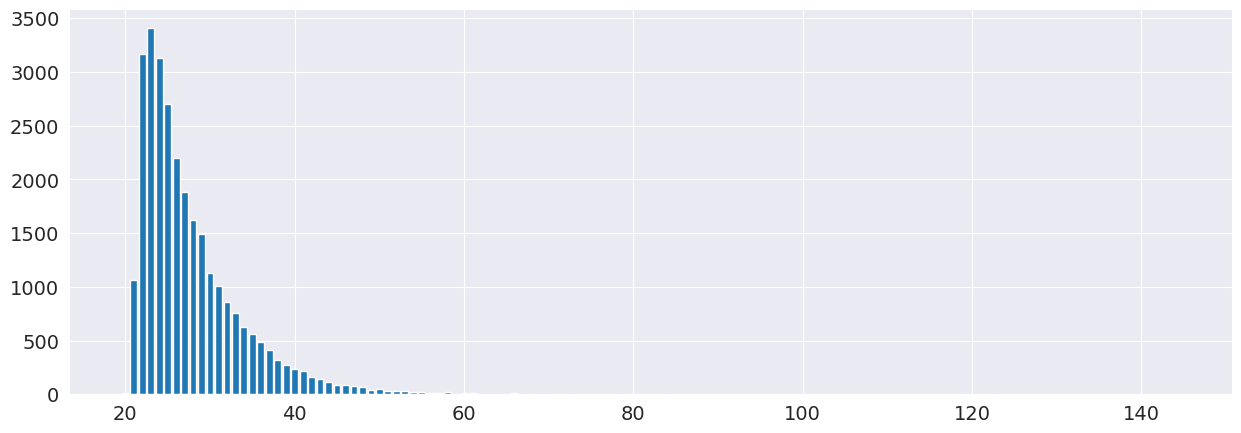

In [34]:
import matplotlib.pyplot as plt
verti = data['person_age'].value_counts().values
hori = data['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

In [35]:
(data['person_age'].value_counts().values>90).sum()
# checking the total number of people who is older than 90 and it is 25, so it is safe to drop them when you compare to total number of customers.

25

# Feature Enginerring


In [40]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)
#dropping age above 80

In [41]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [42]:
data['age_group'].dtype

CategoricalDtype(categories=['20-25', '26-35', '36-45', '46-55', '56-65'], ordered=True, categories_dtype=object)

In [43]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [44]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [45]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [46]:
data = data.drop(['index'], axis=1)
data.reset_index(inplace = True)
data = data.drop(['index'], axis=1)

In [47]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        14548
MORTGAGE    11797
OWN          2192
OTHER          94
Name: count, dtype: int64

In [48]:
data.head() #check the first rows of the last version of data

,level_0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group
0,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small
1,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium
2,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large
3,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large
4,5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small


In [49]:
# Create loan-to-income ratio
data['loan_to_income_ratio'] = data['loan_amnt'] / data['person_income']

# Create loan-to-employment length ratio
data['loan_to_emp_length_ratio'] =  data['person_emp_length']/ data['loan_amnt']

# Create interest rate-to-loan amount ratio
data['int_rate_to_loan_amt_ratio'] = data['loan_int_rate'] / data['loan_amnt']

In [50]:
data.columns

Index(['level_0', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [51]:
raw_data = data.copy() #let's create a copy the data we managed to use it later.

In [52]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

drop_colums = []
scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['cb_person_default_on_file','loan_grade', 'person_home_ownership','loan_intent','income_group','age_group','loan_amount_group']
le_colums = []

In [53]:
data = data.drop(drop_colums, axis=1) #drop the named columns inside the drop_colums

In [54]:
data.columns

Index(['level_0', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

# Data Preprocessing

In [56]:
X = data.drop(['loan_status'], axis=1)  #to predict our target, we remove it from our main data first.
Y = data['loan_status'] # we assign target (loan_status) to Y value

In [58]:
from sklearn.model_selection import train_test_split  #train_test_split is for creating our training and test samples.
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=12) # we split our X and Y datasets from above cell in 80% to 20% percentages

In [60]:
print(x_train.shape,x_test.shape) # then we check the splitted data size as a matrix. shape is a method of Numpy library. First value is the number of samples, second value is the number of features

(22904, 18) (5727, 18)


In [64]:
x_train.reset_index(inplace = True) #again reseting indexes because we have splitted above and need to arrange their index.
x_test.reset_index(inplace = True)

ValueError: cannot insert level_0, already exists

In [63]:
x_train.columns #check the column names of training samples

Index(['index', 'level_0', 'person_age', 'person_income',
       'person_home_ownership', 'person_emp_length', 'loan_intent',
       'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length', 'age_group',
       'income_group', 'loan_amount_group', 'loan_to_income_ratio',
       'loan_to_emp_length_ratio', 'int_rate_to_loan_amt_ratio'],
      dtype='object')

In [66]:
from sklearn.preprocessing import OneHotEncoder  ## OneHotEncoder is a preprocessing tool used to convert categorical variables into
#a format that can be provided to machine learning algorithms to improve predictions, specifically by transforming them into one-hot encoded vectors.
ohe = OneHotEncoder()
ohe.fit(x_train[ohe_colums]) # we use ohe_columns we defined above to convert

OneHotEncoder()

In [67]:
ohe.categories_
##The categories_ attribute of the OneHotEncoder in sklearn contains a list of arrays,
##where each array holds the unique categories for each feature that was one-hot encoded. It essentially shows the distinct values found in each categorical feature after fitting the encoder.

[array(['N', 'Y'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object),
 array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
        'PERSONAL', 'VENTURE'], dtype=object),
 array(['high', 'high-middle', 'low', 'low-middle', 'middle'], dtype=object),
 array(['20-25', '26-35', '36-45', '46-55', '56-65', nan], dtype=object),
 array(['large', 'medium', 'small', 'very large'], dtype=object)]

In [68]:
merge_ohe_col = np.concatenate((ohe.categories_[0],
                ohe.categories_[1],
                ohe.categories_[2],
                ohe.categories_[3],
                ohe.categories_[4],
                ohe.categories_[5],
                ohe.categories_[6],))

In [70]:
merge_ohe_col # we combined and created a single array of categories that includes loan grades, loan intents etc

array(['N', 'Y', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'MORTGAGE', 'OTHER',
       'OWN', 'RENT', 'DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT',
       'MEDICAL', 'PERSONAL', 'VENTURE', 'high', 'high-middle', 'low',
       'low-middle', 'middle', '20-25', '26-35', '36-45', '46-55',
       '56-65', nan, 'large', 'medium', 'small', 'very large'],
      dtype=object)

In [72]:
ohe_data = pd.DataFrame(ohe.transform(x_train[ohe_colums]).toarray(), columns=merge_ohe_col)  # assign training samples to categories from merge_ohe_col
ohe_data2 = pd.DataFrame(ohe.transform(x_test[ohe_colums]).toarray(),columns=merge_ohe_col) # assign testing samples to categories from merge_ohe_col

In [74]:
X_new = pd.concat([ohe_data, x_train], axis=1) #create a new X_new by concatenating objects along a particular axis. The axis=1: specifies that the concatenation should be done column-wise
X_new = X_new.drop(ohe_colums, axis=1)

In [75]:
X_new_test = pd.concat([ohe_data2, x_test], axis=1) #create a new X_train by concatenating objects
X_new_test = X_new_test.drop(ohe_colums, axis=1)

In [76]:
X_new.head()
X_new.shape

(22904, 46)

In [77]:
X_new_test.head() #lets check the first rows of testing samples

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,35,66000,4.0,3000,6.03,0.05,7,0.045455,0.001333,0.002010
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,35,33144,3.0,8400,14.91,0.25,8,0.253440,0.000357,0.001775
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,32,36000,4.0,6000,16.07,0.17,10,0.166667,0.000667,0.002678
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,25,61500,1.0,18000,13.23,0.29,2,0.292683,0.000056,0.000735
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32,24000,7.0,2800,10.99,0.12,9,0.116667,0.002500,0.003925


In [78]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

uniform_col= []

normal_col = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']

bimodal_col = []


scaler_uniform = MinMaxScaler()  # MinMaxScaler: Transform features by scaling each feature to a given range.
#X_new.loc[:,uniform_col] = scaler_uniform.fit_transform(X_new.loc[:,uniform_col])
#X_new_test.loc[:,uniform_col] = scaler_uniform.transform(X_new_test.loc[:,uniform_col])

scaler_normal = StandardScaler()  #StandardScaler makes it easier to interpret the coefficients or weights assigned to each feature in linear models.
X_new.loc[:,normal_col] = scaler_normal.fit_transform(X_new.loc[:,normal_col])
X_new_test.loc[:,normal_col] = scaler_normal.transform(X_new_test.loc[:,normal_col])

scaler_bimodal = RobustScaler() # By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.
#X_new.loc[:,bimodal_col] = scaler_bimodal.fit_transform(X_new.loc[:,bimodal_col])
#X_new_test.loc[:,bimodal_col] = scaler_bimodal.transform(X_new_test.loc[:,bimodal_col])

In [79]:
X_new_test.head()

,N,Y,A,B,C,D,E,F,G,MORTGAGE,...,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.181707,-0.006231,-0.192831,-1.052710,-1.556377,-1.123388,0.296643,0.045455,0.530868,0.076675
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.181707,-0.655354,-0.440648,-0.197407,1.195223,0.757473,0.543970,0.253440,-0.380924,-0.049526
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.695186,-0.598929,-0.192831,-0.577541,1.554667,0.005128,1.038624,0.166667,-0.091820,0.435586
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.440030,-0.095136,-0.936282,1.323133,0.674650,1.133645,-0.939991,0.292683,-0.662616,-0.608033
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.695186,-0.836009,0.550621,-1.084388,-0.019447,-0.465087,0.791297,0.116667,1.620571,1.105078


# ML Classification Models


In [81]:
pip install bayesian-optimization

In [83]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from hyperopt import hp, fmin, tpe

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold, cross_val_score


In [85]:
svc = SVC()
knc = KNeighborsClassifier() #algorithm='ball_tree', leaf_size=10, n_neighbors=18, p=1, weights='distance'
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbdt = GradientBoostingClassifier()
xgb = XGBClassifier()
cat = CatBoostClassifier(verbose=0)
lgb = lgb.LGBMClassifier()

KNN, DT, LR , RFC, SVC, LGBM kullanacağız

# Define the dictionary with selected classifiers
clf = {
    'KNN': knc,
    'LR': lrc,
    'DT': dtc,
    'RF': rfc,
    'LGBM': lgb,
    'SVM': svc,
    'NB': mnb
}


clf = {
    'KN' : knc,
    'xgb':xgb,
    'cat':cat,
    'lgb':lgb
}

In [96]:

# Define the dictionary with selected classifiers
clf = {
    'KNN': knc,
    'LR': lrc,
    'DT': dtc,
    'RF': rfc,
    'SVM': svc,
    'LGBM': lgb

}


    #'NB': mnb,,

In [88]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix  ## creatşing confusion matrix and hence evaluation criterias such recall, precision, acc

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train) # fit the training and test samples for each algoritm
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) #calculate acc
    precision = precision_score(y_test, y_pred) # calculate precision
    recall = recall_score(y_test, y_pred) #calculate  recall

    # Calculate confusion matrix to get TN and FP for specificity
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)

    return accuracy, precision, recall, specificity

# Usage
# accuracy, precision, recall, specificity = train_classifier(clf, x_train, y_train, X_test, y_test)
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Specificity:", specificity)

In [89]:
X_new = X_new.drop(columns=[col for col in X_new.columns if pd.isna(col)], axis=1)
X_new_test = X_new_test.drop(columns=[col for col in X_new_test.columns if pd.isna(col)], axis=1)

In [97]:
accuracy_scores = []
precision_scores = []
recall_scores = []
specificity_scores = []

for name,clf in clf.items():

    current_accuracy,current_precision, current_recall, current_specificity = train_classifier(clf, X_new,y_train,X_new_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("Specificity - ",current_specificity)
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    specificity_scores.append(current_specificity)

For  KNN
Accuracy -  0.786624759909202
Precision -  0.5188356164383562
Recall -  0.24356913183279744
Specificity -  0.9373187597590898

For  LR
Accuracy -  0.8617077003666841
Precision -  0.7585812356979404
Recall -  0.5329581993569131
Specificity -  0.9529333035913451

For  DT
Accuracy -  0.890343984634189
Precision -  0.7421383647798742
Recall -  0.7588424437299035
Specificity -  0.92683470890029

For  RF
Accuracy -  0.9322507420988301
Precision -  0.9776785714285714
Recall -  0.7041800643086816
Specificity -  0.9955387017622128

For  SVM
Accuracy -  0.7827833071416099
Precision -  0.0
Recall -  0.0
Specificity -  1.0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4958, number of negative: 17946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tr

# Hyperparameter Tuning

In [98]:
# Hyperparameter-tuning: Bayesian Optimization, bayes_opt
def lgbm_clf_bo(num_leaves, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree):
    params_lgbm = {'objective': 'binary'}
    params_lgbm['num_leaves'] = round((2**round(max_depth))*num_leaves)
    params_lgbm['max_depth'] = round(max_depth)
    params_lgbm['learning_rate'] = learning_rate
    params_lgbm['min_child_weight'] = min_child_weight
    params_lgbm['subsample'] = subsample
    params_lgbm['colsample_bytree'] = colsample_bytree

    scores = cross_val_score(LGBMClassifier(random_state=12, **params_lgbm),
                             X_new, y_train, scoring='recall', cv=10).mean()
    return scores

# Set parameters distribution
params_lgbm ={
    'num_leaves':(0.5,0.9),
    'max_depth': (3, 15),
    'learning_rate': (0.005, 0.3),
    'min_child_weight':(1e-6, 1e-1),
    'subsample':(0.5, 1),
    'colsample_bytree':(0.5, 1)
}

# Run Bayesian Optimization
lgbm_bo = BayesianOptimization(lgbm_clf_bo, params_lgbm)
lgbm_bo.maximize(init_points=2, n_iter=20)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[LightGBM] [Info] Number of positive: 4463, number of negative: 16151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008968 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2276
[LightGBM] [Info] Number of data points in the train set: 20614, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216503 -> initscore=-1.286161
[LightGBM] [Info] Start training from score -1.286161
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [ ]:
# Best hyperparameters
params_lgbm = lgbm_bo.max['params']
params_lgbm['max_depth'] = round(params_lgbm['max_depth'])
params_lgbm['num_leaves'] = round((2**round(params_lgbm['max_depth']))*params_lgbm['num_leaves'])
params_lgbm


{'colsample_bytree': 0.7503252851165797,
 'learning_rate': 0.2970560093788942,
 'max_depth': 13,
 'min_child_weight': 0.05189381460749179,
 'num_leaves': 4960,
 'subsample': 0.9000135481723022}

# Training Final Model

In [102]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier

# Define classifiers
svc = SVC(probability=True)  # Set probability=True for soft voting
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
lgb = lgb.LGBMClassifier()

# Create the VotingClassifier with the chosen classifiers
ensemble = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('dt', dtc),
        ('lr', lrc),
        ('rf', rfc),
        ('knn', knc),
        ('lgb', lgb)
    ],
    voting='soft',
    verbose=0
)
##        ('mnb', mnb),
# Assuming you have a train_classifier function that takes the model and data as input
current_accuracy, current_precision, current_recall, current_specificity = train_classifier(
    ensemble, X_new, y_train, X_new_test, y_test
)

print("For ensemble")
print("Accuracy - ", current_accuracy)
print("Precision - ", current_precision)
print("Recall - ", current_recall)
print("Specificity - ", current_specificity)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4958, number of negative: 17946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2275
[LightGBM] [Info] Number of data points in the train set: 22904, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216469 -> initscore=-1.286365
[LightGBM] [Info] Start training from score -1.286365
For ensemble
Accuracy -  0.9301554042255981
Precision -  0.9861751152073732
Recall -  0.6881028938906752
Specificity -  0.9973232210573277


In [ ]:
##original one :

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import MultinomialNB


# Define classifiers
svc = SVC(probability=True)  # Set probability=True for soft voting
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
knc = KNeighborsClassifier()
lgb = lgb.LGBMClassifier()


#knn = KNeighborsClassifier()
cat = CatBoostClassifier(verbose=0)
#lgb = LGBMClassifier()
#dtc = DecisionTreeClassifier()
#lrc = LogisticRegression()
#svc = SVC()
#mnb = MultinomialNB()
#rfc = RandomForestClassifier()



ensemble = VotingClassifier(estimators=[('knn', knn),  ('cat', cat), ('lgb', lgb)], voting='soft',verbose=0)
current_accuracy,current_precision, current_recall, current_specificity = train_classifier(ensemble, X_new, y_train, X_new_test, y_test)

print("For ensemble")
print("Accuracy - ",current_accuracy)
print("Precision - ",current_precision)
print("Recall - ",current_recall)
print("Specificity - ",current_specificity)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4958, number of negative: 17946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2020
[LightGBM] [Info] Number of data points in the train set: 22904, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216469 -> initscore=-1.286365
[LightGBM] [Info] Start training from score -1.286365
For ensemble
Accuracy -  0.9360921948664223
Precision -  0.9943693693693694
Recall -  0.7098070739549839
Specificity -  0.9988846754405531


In [103]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
from sklearn.feature_selection import RFE

clf = RandomForestRegressor()


clf.fit(X_new,y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_new.columns).sort_values(ascending=False)
feature_scores


loan_to_income_ratio          0.232110
loan_int_rate                 0.154348
RENT                          0.122777
person_income                 0.101167
person_emp_length             0.036480
int_rate_to_loan_amt_ratio    0.031789
MEDICAL                       0.030928
loan_to_emp_length_ratio      0.029480
DEBTCONSOLIDATION             0.027590
C                             0.026751
person_age                    0.026463
index                         0.026369
level_0                       0.025575
D                             0.018914
loan_percent_income           0.018650
cb_person_cred_hist_length    0.014426
loan_amnt                     0.013825
OWN                           0.010567
HOMEIMPROVEMENT               0.010472
MORTGAGE                      0.004818
EDUCATION                     0.004635
PERSONAL                      0.004320
VENTURE                       0.003479
G                             0.003067
N                             0.002199
Y                        

# Auto ML using PyCaret

In [ ]:
from pycaret.classification import *

In [ ]:
raw_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,0.104167,0.005000,0.011140
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,0.572917,0.000182,0.002340
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,0.534351,0.000114,0.000435
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,0.643382,0.000229,0.000408
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,0.252525,0.000800,0.002856


In [ ]:
model = setup(data = raw_data, target = 'loan_status', session_id=123)

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(28631, 18)"
4,Transformed data shape,"(28631, 43)"
5,Transformed train set shape,"(20041, 43)"
6,Transformed test set shape,"(8590, 43)"
7,Numeric features,10
8,Categorical features,7
9,Rows with missing values,0.1%


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9372,0.9433,0.7270,0.9775,0.8338,0.7961,0.8094,12.1680
lightgbm,Light Gradient Boosting Machine,0.9354,0.9415,0.7226,0.9722,0.8290,0.7903,0.8035,1.1560
xgboost,Extreme Gradient Boosting,0.9339,0.9444,0.7328,0.9508,0.8276,0.7875,0.7978,0.7290
rf,Random Forest Classifier,0.9322,0.9268,0.7127,0.9653,0.8199,0.7793,0.7930,4.4930
gbc,Gradient Boosting Classifier,0.9281,0.9246,0.7026,0.9536,0.8090,0.7660,0.7796,4.1720
et,Extra Trees Classifier,0.9238,0.9192,0.7118,0.9181,0.8017,0.7554,0.7649,2.1870
dt,Decision Tree Classifier,0.8864,0.8393,0.7563,0.7295,0.7426,0.6697,0.6700,0.6190
ada,Ada Boost Classifier,0.8860,0.8968,0.6416,0.7929,0.7091,0.6391,0.6448,1.2360
lda,Linear Discriminant Analysis,0.8712,0.8823,0.6077,0.7504,0.6712,0.5922,0.5975,0.5050
ridge,Ridge Classifier,0.8652,0.8772,0.5379,0.7708,0.6331,0.5538,0.5675,0.2920


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
model = setup(data = data_original, target = 'loan_status', session_id=123)

,Description,Value
0,Session id,123
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(32581, 12)"
4,Transformed data shape,"(32581, 26)"
5,Transformed train set shape,"(22806, 26)"
6,Transformed test set shape,"(9775, 26)"
7,Numeric features,7
8,Categorical features,4
9,Rows with missing values,12.1%


In [ ]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:16:50
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9335,0.9456,0.7343,0.9496,0.8280,0.7876,0.7977,0.5690
rf,Random Forest Classifier,0.9319,0.9288,0.7124,0.9671,0.8203,0.7795,0.7934,2.3550
gbc,Gradient Boosting Classifier,0.9274,0.9271,0.7033,0.9512,0.8086,0.7650,0.7784,2.8230
et,Extra Trees Classifier,0.9181,0.9135,0.6780,0.9270,0.7831,0.7341,0.7478,2.1150
dt,Decision Tree Classifier,0.8844,0.8396,0.7602,0.7244,0.7416,0.6672,0.6677,0.2760
ada,Ada Boost Classifier,0.8821,0.8976,0.6322,0.7861,0.7006,0.6283,0.6342,0.8500
lda,Linear Discriminant Analysis,0.8614,0.8658,0.5749,0.7324,0.6440,0.5595,0.5659,0.2200
ridge,Ridge Classifier,0.8571,0.8658,0.5031,0.7609,0.6056,0.5227,0.5395,0.2250
lr,Logistic Regression,0.8475,0.8511,0.4496,0.7525,0.5623,0.4771,0.5006,1.8360
knn,K Neighbors Classifier,0.8293,0.8018,0.4800,0.6467,0.5509,0.4483,0.4560,1.0070


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9356,0.9442,0.7256,0.9724,0.8310,0.7923,0.8053,11.2000
lightgbm,Light Gradient Boosting Machine,0.9350,0.9458,0.7230,0.9716,0.8291,0.7900,0.8032,1.4550
xgboost,Extreme Gradient Boosting,0.9335,0.9456,0.7343,0.9496,0.8280,0.7876,0.7977,0.5690
rf,Random Forest Classifier,0.9319,0.9288,0.7124,0.9671,0.8203,0.7795,0.7934,2.3550
gbc,Gradient Boosting Classifier,0.9274,0.9271,0.7033,0.9512,0.8086,0.7650,0.7784,2.8230
et,Extra Trees Classifier,0.9181,0.9135,0.6780,0.9270,0.7831,0.7341,0.7478,2.1150
dt,Decision Tree Classifier,0.8844,0.8396,0.7602,0.7244,0.7416,0.6672,0.6677,0.2760
ada,Ada Boost Classifier,0.8821,0.8976,0.6322,0.7861,0.7006,0.6283,0.6342,0.8500
lda,Linear Discriminant Analysis,0.8614,0.8658,0.5749,0.7324,0.6440,0.5595,0.5659,0.2200
ridge,Ridge Classifier,0.8571,0.8658,0.5031,0.7609,0.6056,0.5227,0.5395,0.2250


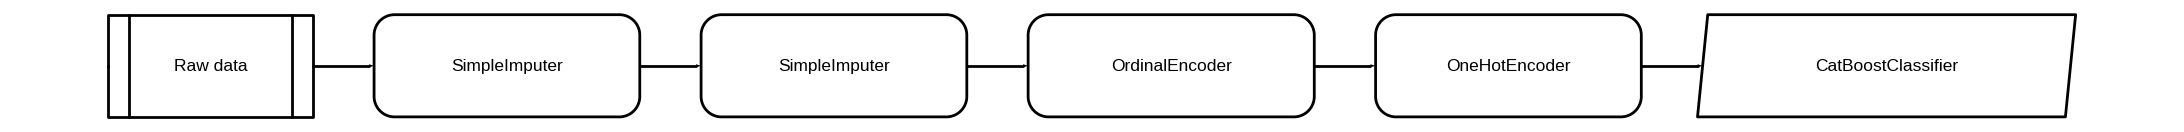

In [ ]:
evaluate_model(best)

In [ ]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9392,0.9481,0.7421,0.9730,0.8420,0.8052,0.8166


In [ ]:
# save pipeline
save_model(best, 'my_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['person_age', 'person_income',
                                              'person_emp_length', 'loan_amnt',
                                              'loan_int_rate',
                                              'loan_percent_income',
                                              'cb_person_cred_hist_length'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=n...
                                     include=['person_home_ownership',
                      

# Auto ML using AutoGluon

In [ ]:
from sklearn.model_selection import train_test_split

#split dataframe into train and test sets
train, test = train_test_split(data, test_size=0.2,random_state=12)

#print size of each set
print(train.shape, test.shape)

(22904, 18) (5727, 18)


In [ ]:
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_to_income_ratio,loan_to_emp_length_ratio,int_rate_to_loan_amt_ratio
8981,23,66000,MORTGAGE,5.0,VENTURE,A,6000,6.62,0,0.09,N,2,20-25,middle,medium,0.090909,0.000833,0.001103
27638,44,95000,MORTGAGE,4.0,VENTURE,B,10000,10.95,0,0.11,N,15,36-45,high-middle,medium,0.105263,0.000400,0.001095
2128,25,32004,MORTGAGE,3.0,PERSONAL,A,22750,6.17,0,0.71,N,4,20-25,low-middle,very large,0.710849,0.000132,0.000271
25179,34,90000,MORTGAGE,19.0,VENTURE,C,5000,13.61,0,0.06,Y,8,26-35,high-middle,small,0.055556,0.003800,0.002722
5763,23,50000,MORTGAGE,6.0,VENTURE,A,7000,5.99,0,0.14,N,3,20-25,low-middle,medium,0.140000,0.000857,0.000856


In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor



predictor = TabularPredictor(label='loan_status').fit(train_data=train)
predictions = predictor.predict(test)

No path specified. Models will be saved in: "AutogluonModels/ag-20240701_162130"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Tue Jun 18 14:18:04 UTC 2024
CPU Count:          2
Memory Avail:       10.66 GB / 12.67 GB (84.1%)
Disk Space Avail:   75.70 GB / 107.72 GB (70.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

In [ ]:
predictor.evaluate(test, silent=True)

{'accuracy': 0.9359175833769862,
 'balanced_accuracy': 0.8551055326553403,
 'mcc': 0.8065049060839535,
 'roc_auc': 0.9407888177774846,
 'f1': 0.828424497428705,
 'precision': 0.9899441340782122,
 'recall': 0.7122186495176849}

In [ ]:
predictor.leaderboard(test, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost,0.938013,0.928852,accuracy,0.147763,0.029639,2.827448,0.147763,0.029639,2.827448,1,True,11
1,WeightedEnsemble_L2,0.935918,0.931471,accuracy,0.577465,0.152646,17.747526,0.003857,0.001269,0.239850,2,True,14
2,CatBoost,0.935743,0.929725,accuracy,0.071060,0.007202,13.480514,0.071060,0.007202,13.480514,1,True,7
3,LightGBMLarge,0.935045,0.928852,accuracy,0.068491,0.016833,1.893616,0.068491,0.016833,1.893616,1,True,13
4,LightGBM,0.934171,0.930162,accuracy,0.122773,0.037950,1.522025,0.122773,0.037950,1.522025,1,True,4
5,LightGBMXT,0.931552,0.926233,accuracy,0.379775,0.106225,2.505138,0.379775,0.106225,2.505138,1,True,3
6,RandomForestEntr,0.929806,0.924051,accuracy,1.061802,0.142255,12.484622,1.061802,0.142255,12.484622,1,True,6
7,RandomForestGini,0.928584,0.921432,accuracy,1.077248,0.152295,9.313030,1.077248,0.152295,9.313030,1,True,5
8,NeuralNetFastAI,0.926139,0.926233,accuracy,0.226087,0.062058,33.588963,0.226087,0.062058,33.588963,1,True,10
9,ExtraTreesEntr,0.921425,0.915321,accuracy,0.838430,0.180104,6.384228,0.838430,0.180104,6.384228,1,True,9
